In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
def plot_degree_dist(G, loglog=False):
    all_degrees = dict(G.degree).values()
    unique_degrees = list(set(all_degrees))
    
    degree_count = []
    for i in unique_degrees:
        x = list(all_degrees).count(i)
        degree_count.append(x)
        
    if loglog:    
        plt.loglog(unique_degrees, degree_count, 'bo')
    else:
        plt.plot(unique_degrees, degree_count, 'bo')
        
    plt.xlabel('Degrees')
    plt.ylabel('Number of Nodes')
    plt.title('Degree Distribution')
    plt.show()

In [3]:
graph = nx.read_edgelist('./data/bn-mouse_visual-cortex_1.edges')

In [4]:
print(nx.info(graph))

Graph with 29 nodes and 44 edges


In [5]:
nx.density(graph)

0.10837438423645321

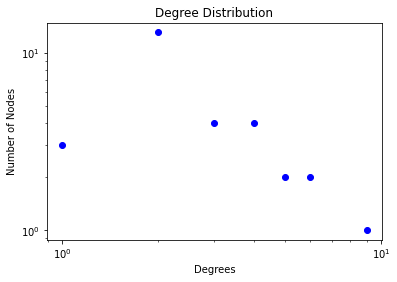

In [6]:
plot_degree_dist(graph, True)

In [7]:
nx.write_gexf(graph, 'anim3.gexf')

In [8]:
from karateclub.node_embedding.neighbourhood import Walklets
graph_num = nx.convert_node_labels_to_integers(graph, first_label=0, ordering='default')
model = Walklets()
model.fit(graph_num)
embedding = model.get_embedding()